In [39]:
#url = "https://en.wikipedia.org/wiki/{}".format(movie)
from textblob import TextBlob
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup



def getUrlFromIndiaGlitz(movie):
    movie1 = movie.replace(' ','-')
    url="http://www.indiaglitz.com/telugu-movie-reviews"
    response = requests.get(url)
    page =urlopen(url).read()
    soup = BeautifulSoup(page,"lxml")
    for link in soup.findAll('a'):        
        if type(link.get('href'))==str:
            if link.get('href').find(movie1)!=-1:
                print(link.get('href'))
                return link.get('href')
            
def getUrlFromApherald(movie):    
    movie1 = movie.title().replace(' ','-')
    url="http://www.apherald.com/reviews/en"
    response = requests.get(url)
    page =urlopen(url).read()
    soup = BeautifulSoup(page,"lxml")
    for link in soup.findAll('a'):        
        if type(link.get('href'))==str:
            if link.get('href').find(movie1)!=-1:
                print(link.get('href'))
                return link.get('href')   

            
def getUrlFromMovieReviews(movie):    
    movie1 = movie.title().replace(' ','-')
    url="http://www.gulte.com/moviereviews"
    response = requests.get(url)
    page =urlopen(url).read()
    soup = BeautifulSoup(page,"lxml")
    for link in soup.findAll('a'):        
        if type(link.get('href'))==str:
            if link.get('href').find(movie1)!=-1:
                print(link.get('href'))
                return link.get('href')       

def getUrlFromTupaki(movie):    
    movie1 = movie.title().replace(' ','-')
    url="http://www.tupaki.com/moviereviews"
    response = requests.get(url)
    page =urlopen(url).read()
    soup = BeautifulSoup(page,"lxml")
    for link in soup.findAll('a'):        
        if type(link.get('href'))==str:
            if link.get('href').find(movie1)!=-1:
                print(link.get('href'))
                return link.get('href')       

def getUrlFrom123Telugu(movie):    
    movie1 = movie.title().replace(' ','-')
    url="http://www.123telugu.com/category/reviews/telugu-movie-reviews"
    response = requests.get(url)
    page =urlopen(url).read()
    soup = BeautifulSoup(page,"lxml")
    for link in soup.findAll('a'):        
        if type(link.get('href'))==str:
            if link.get('href').find(movie1)!=-1:
                print(link.get('href'))
                return link.get('href')                     

Enter movie name: jai lava kusa
http://www.indiaglitz.com/jai-lava-kusa-telugu-movie-review-21463
http://www.apherald.com/Movies/Reviews/282830/Jai-Lava-Kusa-Telugu-Movie-Review-Rating/
http://www.gulte.com/moviereviews/638/Movie-Review-Jai-Lava-Kusa-Movie-Review
http://www.tupaki.com/movie/review/Jai-Lava-Kusa/667
https://gallery.123telugu.com/content/reviews/J/Jai-Lava-Kusa/Jai-Lava-Kusa-twitter-updates.html
done


In [42]:
def getRating(movie):    
    for url in url_list:    
        html=urlopen(url).read()#read source code
        soup=BeautifulSoup(html,"lxml")
        #Now you have to pass something to BeautifulSoup to create a soup object.
        #That could be a document or an URL.(obj creation)
        for script in soup(["script","style"]):
            script.extract()
        text=soup.get_text()#text format
        tweets=[line.strip() for line in text.splitlines()]#lines/space remove

    ptweets = [tweet for tweet in tweets if TextBlob(tweet).sentiment.polarity>0] #TO KNOW THE POSITIVE SENTENCE
    ntweets = [tweet for tweet in tweets if TextBlob(tweet).sentiment.polarity<0] #TO KNOW THE NEGATIVE SENTENCES
    neu_tweets = [tweet for tweet in tweets if TextBlob(tweet).sentiment.polarity==0] #TO KNOW THE NEUTRAL SENTENCES

    ppoints=len(ptweets)*2
    npoints=len(ntweets)*2
    neu_points=len(neu_tweets)*0.02
    total_points=ppoints+npoints+neu_points

    # DATA VISUALIZATION
    import matplotlib.pyplot as plt

    # Data to plot
    labels = "poitive","Negative","Neutral"
    sizes = [ppoints,npoints,neu_points ]
    colors = ["b","g","m"]
    explode = (0.33, 0.33, 0.33)  # explode 1st slice

    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()

    rating=(ppoints/total_points)*5
    print("Rating of the movie out of 5 is {}".format(rating))

Enter movie name: jai lava kusa
http://www.indiaglitz.com/jai-lava-kusa-telugu-movie-review-21463
http://www.apherald.com/Movies/Reviews/282830/Jai-Lava-Kusa-Telugu-Movie-Review-Rating/
http://www.gulte.com/moviereviews/638/Movie-Review-Jai-Lava-Kusa-Movie-Review
http://www.tupaki.com/movie/review/Jai-Lava-Kusa/667
https://gallery.123telugu.com/content/reviews/J/Jai-Lava-Kusa/Jai-Lava-Kusa-twitter-updates.html
done


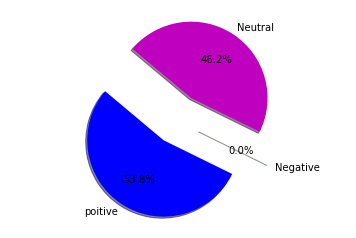

Rating of the movie out of 5 is 2.691790040376851


In [44]:
main=input('Enter movie name: ')
url_list=[]           

url_list.append(getUrlFromIndiaGlitz(main))
url_list.append(getUrlFromApherald(main))
url_list.append(getUrlFromMovieReviews(main))
url_list.append(getUrlFromTupaki(main))
url_list.append(getUrlFrom123Telugu(main))
print("done")
getRating(main)